## EDA on Vehicle Sales in the US

In [24]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import requests
import json
import plotly_express as px

In [25]:
#importing dataframe
vehicles_us = pd.read_csv('/Users/danie/My-New-Repo/vehicles_us.csv')
display(vehicles_us)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


# Some Basic EDA

paint_color
black      7692
blue       4475
brown      1223
custom     1153
green      1396
grey       5037
orange      231
purple      102
red        4421
silver     6244
white     10029
yellow      255
Name: type, dtype: int64


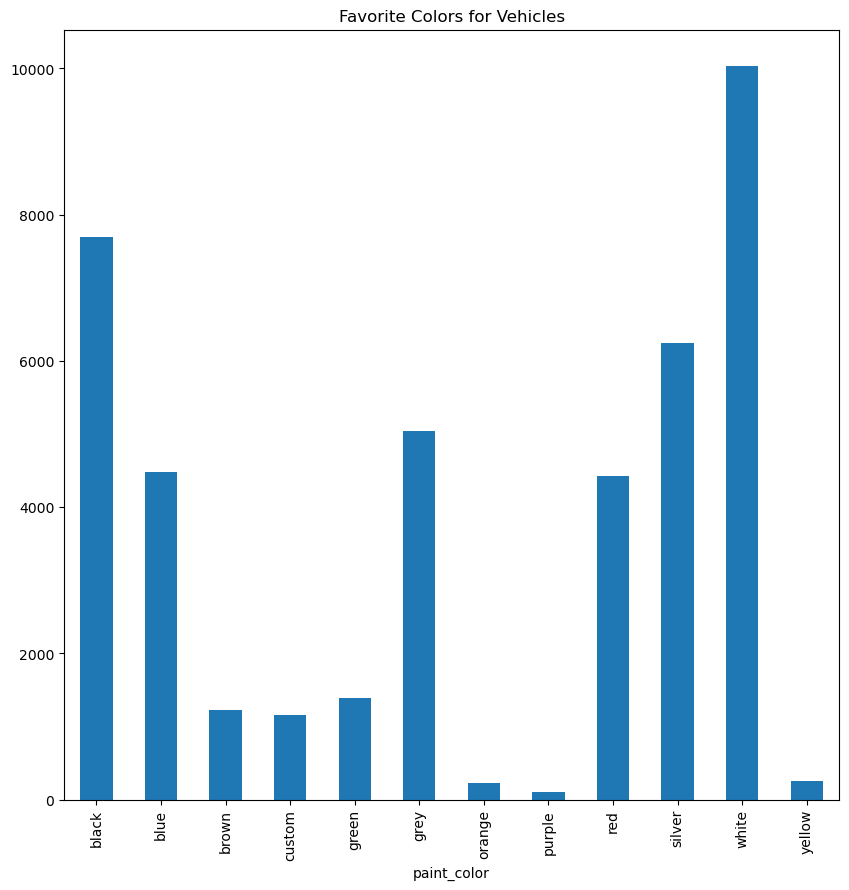

In [26]:
#creating a dataframe for the colors and using a bar graph
pop_colors = vehicles_us.groupby('paint_color')['type'].count()
print(pop_colors)
pop_colors.plot(kind='bar', title='Favorite Colors for Vehicles',figsize=[10,10])
plt.show()

White and Black are the most purchased colors.

In [27]:
print(vehicles_us['fuel'].value_counts())


gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64


It looks like gas vehicles are by far the most popular.

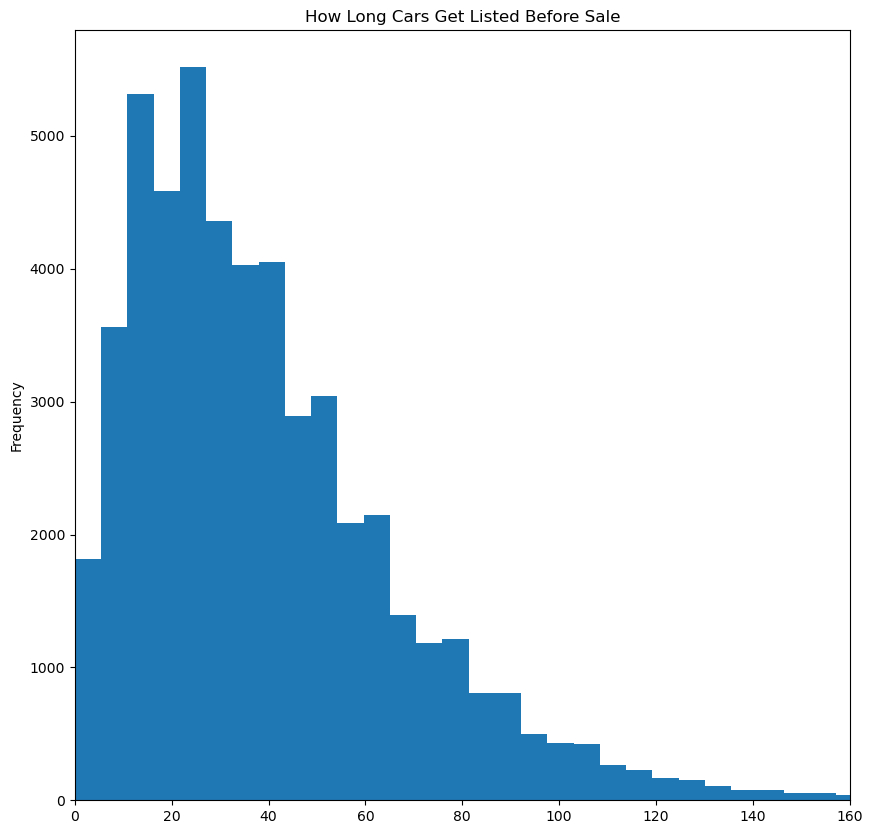

In [28]:
#creating a dataframe with the days listed and graphing on a histogram
vehicles_us['days_listed'].plot(kind='hist', title='How Long Cars Get Listed Before Sale', xlabel='Days Listed', xlim= [0,160],bins = 50,figsize=[10,10] )
plt.show()

It looks like cars tend to be sold within thirty days.  I wonder if that differs if the cars are in worse condition.

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64


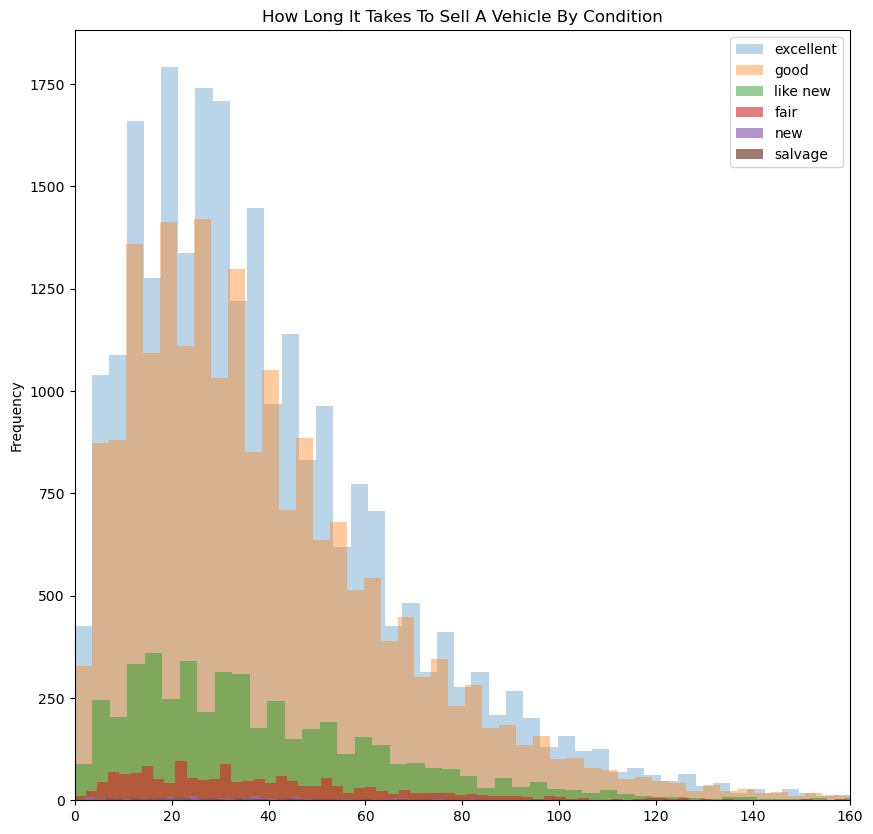

In [29]:
print(vehicles_us['condition'].value_counts())
#splitting into multiple dataframes based on the condition
excellent_veh = vehicles_us[vehicles_us['condition'] == 'excellent']
good_veh = vehicles_us[vehicles_us['condition'] == 'good']
like_new_veh = vehicles_us[vehicles_us['condition'] == 'like new']
fair_veh = vehicles_us[vehicles_us['condition'] == 'fair']
new_veh = vehicles_us[vehicles_us['condition'] == 'new']
salvage_veh = vehicles_us[vehicles_us['condition'] == 'salvage']

#creating histograms for all of the different dataframes
excellent_veh['days_listed'].plot(kind='hist' ,title='How Long It Takes To Sell A Vehicle By Condition', bins = 75, figsize=[10,10], xlim=[0,160], alpha= 0.3 )
good_veh['days_listed'].plot(kind='hist' ,title='How Long It Takes To Sell A Vehicle By Condition', bins = 75, figsize=[10,10], xlim=[0,160], alpha= 0.4 )
like_new_veh['days_listed'].plot(kind='hist' ,title='How Long It Takes To Sell A Vehicle By Condition', bins = 75, figsize=[10,10], xlim=[0,160], alpha= 0.5 )
fair_veh['days_listed'].plot(kind='hist' ,title='How Long It Takes To Sell A Vehicle By Condition', bins = 75, figsize=[10,10], xlim=[0,160], alpha= 0.6 )
new_veh['days_listed'].plot(kind='hist' ,title='How Long It Takes To Sell A Vehicle By Condition', bins = 75, figsize=[10,10], xlim=[0,160], alpha= 0.7 )
salvage_veh['days_listed'].plot(kind='hist' ,title='How Long It Takes To Sell A Vehicle By Condition', bins = 75, figsize=[10,10], xlim=[0,160], alpha= 0.8 )

plt.legend(['excellent','good','like new','fair','new','salvage'])
plt.show()

Apparently most vehicles sell in less than 30 days regardless of condition.

In [34]:
print(vehicles_us['model_year'].corr(vehicles_us['price']))


0.4286564671041149


Price is not very related to the year of the vehicle

In [35]:
print(vehicles_us.corr())

                price  model_year  cylinders  odometer  is_4wd  days_listed
price        1.000000    0.428656   0.296627 -0.420299     NaN    -0.000682
model_year   0.428656    1.000000  -0.148040 -0.473948     NaN    -0.005703
cylinders    0.296627   -0.148040   1.000000  0.090160     NaN     0.005517
odometer    -0.420299   -0.473948   0.090160  1.000000     NaN     0.003804
is_4wd            NaN         NaN        NaN       NaN     NaN          NaN
days_listed -0.000682   -0.005703   0.005517  0.003804     NaN     1.000000


C:\Users\danie\AppData\Local\Temp\ipykernel_13232\3513550343.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(vehicles_us.corr())


In fact it looks like no column is really correlated with another.